# O Scikit-Learn
- Ferramentas simples e eficientes para análise preditiva de dados
- Acessível a todos e reutilizável em vários contextos
- Construído em NumPy, SciPy e Matplotlib
- Disponível em: https://scikit-learn.org/

### Utilizando o Scikit-Learn nos dados vistos no módulo "Utilizando o Aprendizado de Máquinas"
- Vamos usar o dataset iris, bastante conhecido pra quem já trabalha com Machine Learning
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [100]:
# Importando o pandas
import pandas as pd

In [101]:
# Importando o dataset iris
from sklearn.datasets import load_iris
data = load_iris()

In [102]:
# Transformando em um dataframe e usando somente target 0 e 1
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris['target'] = data.target
# iris = iris[iris.target != 2]
iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [103]:
# Verificando os valores na base
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [104]:
# Definindo os valores de X e y do modelo
X = iris[['petal length (cm)','petal width (cm)']]
y = iris.target

In [105]:
# Definindo os valores de X e y do modelo
X2 = iris.drop('target',axis=1)
y2 = iris.target

### Separando esses dados em treino e teste
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

### Vamos utilizar o Perceptron para separar esses dados
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [109]:
# Importação do perceptron
from sklearn.linear_model import Perceptron

In [110]:
# Criando o nosso classificador
clfPercep = Perceptron()

In [111]:
# Fazendo o fit do modelo
clfPercep.fit(X_train2, y_train2)

Perceptron()

In [112]:
# Avaliando o modelo para a base completa 
# (não separamos ainda em treino e teste)
clfPercep.score(X_train2, y_train2)

0.8

### Agora vamos utilizar a árvore de decisão para tratar esses dados
- https://scikit-learn.org/stable/modules/tree.html

In [113]:
# Importando a árvore de decisão
from sklearn import tree

In [114]:
# Criando o nosso classificador
clfArvore = tree.DecisionTreeClassifier()

In [115]:
# Fazendo o fit com os dados
clfArvore.fit(X_train, y_train)

DecisionTreeClassifier()

In [116]:
# Avaliando o modelo
clfArvore.score(X_train, y_train)

0.9904761904761905

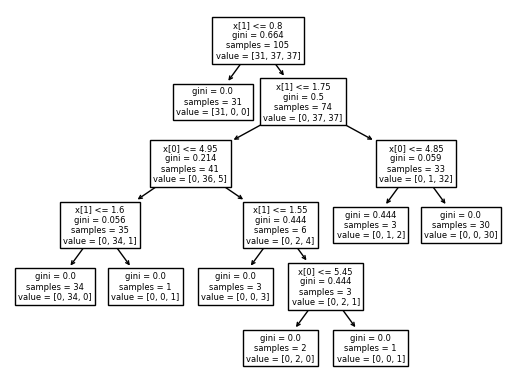

In [117]:
tree.plot_tree(clfArvore);

### <font color='blue'> Utilizando a Regressão Logística </font>
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [118]:
# Importar a regressão logística
from sklearn.linear_model import LogisticRegression

In [119]:
# Criando o nosso classificador
clfLogist = LogisticRegression(random_state=0).fit(X_train, y_train)

In [120]:
# Avaliando o modelo
clfLogist.score(X_train, y_train)

0.9523809523809523

### Avaliando esses três modelos
- https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
predictPercep = clfPercep.predict(X_test2)
predictArvore = clfArvore.predict(X_test)
predictLogist = clfLogist.predict(X_test)

In [123]:
# Perceptron
confusion_matrix(y_test2, predictPercep)

array([[19,  0,  0],
       [ 0,  5,  8],
       [ 0,  0, 13]], dtype=int64)

In [124]:
# Árvore de Decisão
confusion_matrix(y_test, predictArvore)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [125]:
# Regressão Logística
confusion_matrix(y_test, predictLogist)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

**Acurácia**

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
# Perceptron
accuracy_score(y_test2, predictPercep)

0.8222222222222222

In [128]:
# Árvore de Decisão
accuracy_score(y_test, predictArvore)

1.0

In [129]:
# Regressão Logística
accuracy_score(y_test, predictLogist)

1.0

**Precisão**

In [130]:
from sklearn.metrics import precision_score

In [131]:
# Perceptron
precision_score(y_test2, predictPercep,average='micro')

0.8222222222222222

In [132]:
# Árvore de Decisão
precision_score(y_test, predictArvore,average='micro')

1.0

In [133]:
# Regressão Logística
precision_score(y_test, predictLogist,average='micro')

1.0

**Recall**

In [134]:
from sklearn.metrics import recall_score

In [135]:
# Perceptron
recall_score(y_test2, predictPercep,average='micro')

0.8222222222222222

In [136]:
# Árvore de Decisão
recall_score(y_test, predictArvore,average='micro')

1.0

In [137]:
# Regressão Logística
recall_score(y_test, predictLogist,average='micro')

1.0